In [74]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler,MinMaxScaler

from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")


# Data Gathering

In [75]:
df=pd.read_csv(r"C:\Users\Rutuja Salunke\Downloads\diabetes.csv")
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,50,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,52,1
3,150,66,23,94,28.1,0.167,21,0
4,150,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63,0
764,122,70,27,0,36.8,0.340,27,0
765,121,72,23,112,26.2,0.245,30,0
766,126,60,0,0,30.1,0.349,47,1


# EDA

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


In [77]:
df.describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,121.117188,69.076823,20.536458,79.799479,31.992578,0.471876,33.243490,0.348958
std,31.805091,19.367794,15.952218,115.244002,7.884160,0.331329,11.758182,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,142.000000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [78]:
df.dtypes

Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [79]:
df.columns

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [80]:
df.isna().sum()

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<Axes: xlabel='Outcome', ylabel='count'>

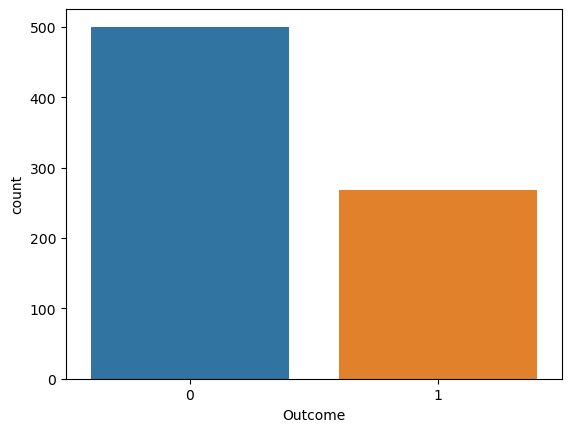

In [86]:
sns.countplot(x=df["Outcome"])

# Feature Engineering

In [57]:
# Finding ouliers by function

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75) 
IQR = Q3 - Q1

lower_tail = Q1 - 1.5 * IQR
upper_tail = Q3 + 1.5 * IQR

ouliers = (df < lower_tail) | (df > upper_tail)
ouliers_count = ouliers.sum()
print(ouliers_count)

Glucose                      5
BloodPressure               45
SkinThickness                1
Insulin                     34
BMI                         19
DiabetesPedigreeFunction    29
Age                          9
Outcome                      0
dtype: int64


In [58]:
# To replace outliers
def Finding_outliar1(df,columns):
    for column in columns:
            q1 = df[column].quantile(0.25)
            q3 = df[column].quantile(0.75)
            iqr = q3 - q1

            lower_tail1 = q1 - 1.5 * iqr
            upper_tail1 = q3 + 1.5 * iqr
            print(lower_tail1)
            print(upper_tail1)
            
            df[column] = df[column].apply(lambda x : upper_tail1 if x > upper_tail1 else (lower_tail1 if x < lower_tail1 else x))
columns = df.columns

Finding_outliar1(df,columns)

34.5
206.5
35.0
107.0
-48.0
80.0
-190.875
318.125
13.35
50.550000000000004
-0.32999999999999996
1.2
-1.5
66.5
-1.5
2.5


# Model training

In [59]:
x=df.iloc[:,:-1]
x

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148.0,50.0,35.0,0.0,33.6,0.627,50.0
1,85.0,66.0,29.0,0.0,26.6,0.351,31.0
2,183.0,64.0,0.0,0.0,23.3,0.672,52.0
3,150.0,66.0,23.0,94.0,28.1,0.167,21.0
4,150.0,40.0,35.0,168.0,43.1,1.200,33.0
...,...,...,...,...,...,...,...
763,101.0,76.0,48.0,180.0,32.9,0.171,63.0
764,122.0,70.0,27.0,0.0,36.8,0.340,27.0
765,121.0,72.0,23.0,112.0,26.2,0.245,30.0
766,126.0,60.0,0.0,0.0,30.1,0.349,47.0


In [60]:
y=df.iloc[:,-1]
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [61]:
from sklearn.model_selection import train_test_split


In [62]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=42)
xtrain

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
334,95.0,60.0,18.0,58.000,23.9,0.260,22.0
139,105.0,72.0,29.0,318.125,36.9,0.159,28.0
485,135.0,68.0,42.0,250.000,42.3,0.365,24.0
547,131.0,68.0,21.0,166.000,33.1,0.160,28.0
18,103.0,35.0,38.0,83.000,43.3,0.183,33.0
...,...,...,...,...,...,...,...
71,139.0,64.0,35.0,140.000,28.6,0.411,26.0
106,96.0,107.0,0.0,0.000,22.4,0.207,27.0
270,101.0,86.0,37.0,0.000,45.6,1.136,38.0
435,141.0,35.0,0.0,0.000,42.4,0.205,29.0


In [63]:
xtest

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
668,98.0,58.0,33.0,190.0,34.0,0.430,43.0
324,112.0,75.0,32.0,0.0,35.7,0.148,21.0
624,108.0,64.0,0.0,0.0,30.8,0.158,21.0
690,107.0,80.0,0.0,0.0,24.6,0.856,34.0
473,136.0,90.0,0.0,0.0,29.9,0.210,50.0
...,...,...,...,...,...,...,...
619,119.0,35.0,0.0,0.0,32.4,0.141,24.0
198,109.0,64.0,44.0,99.0,34.8,0.905,26.0
538,127.0,80.0,37.0,210.0,36.3,0.804,23.0
329,105.0,70.0,32.0,68.0,30.8,0.122,37.0


In [64]:
from sklearn.preprocessing import StandardScaler

In [65]:
std=StandardScaler()
std_array=std.fit_transform(df)
df_std=pd.DataFrame(std_array,columns=df.columns)
df_std

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.858809,-1.453897,0.914986,-0.787602,0.209359,0.588927,1.445723,1.365896
1,-1.170772,-0.327732,0.536065,-0.787602,-0.784254,-0.378101,-0.189562,-0.732120
2,1.986354,-0.468502,-1.295388,-0.787602,-1.252672,0.746595,1.617859,1.365896
3,0.923240,-0.327732,0.157144,0.217583,-0.571337,-1.022787,-1.050238,-0.732120
4,0.923240,-2.157750,0.914986,1.008900,1.557835,2.596563,-0.017426,1.365896
...,...,...,...,...,...,...,...,...
763,-0.655323,0.376122,1.735982,1.137221,0.109998,-1.008772,2.564603,-0.732120
764,0.021204,-0.046190,0.409758,-0.787602,0.663583,-0.416642,-0.533832,-0.732120
765,-0.011011,0.094580,0.157144,0.410066,-0.841032,-0.749497,-0.275629,-0.732120
766,0.150067,-0.750044,-1.295388,-0.787602,-0.287447,-0.385109,1.187520,1.365896


In [66]:
from sklearn.neighbors import KNeighborsClassifier

In [67]:
knn=KNeighborsClassifier(n_neighbors=10)
knn

KNeighborsClassifier(n_neighbors=10)

In [68]:
knn.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=10)

In [69]:
ypred=knn.predict(xtest)
ypred

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [70]:
from sklearn.metrics import confusion_matrix


In [71]:
mat=confusion_matrix(ytest,ypred)
print(mat)

[[123  28]
 [ 39  41]]


In [72]:
from sklearn.metrics import accuracy_score

In [73]:
score=accuracy_score(ytest,ypred)
score

0.70995670995671